In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import legend

In [376]:
# 한글 폰트 설정
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\MALGUNSL.ttf'
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font', family=font_name)
plt.rc('axes', unicode_minus = False)

In [381]:
from matplotlib import rcParams
plt.rcParams['font.family'] = 'Segoe UI Emoji'

In [378]:
!pip install matplotlib seaborn

In [46]:
df = pd.read_csv('data/student_habits_performance.csv')

In [47]:
print(df.shape)
print(df.dtypes)
print(df.head())

(1000, 16)
student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object
  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female              

In [48]:
print(df.describe())
print(df.info())

             age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


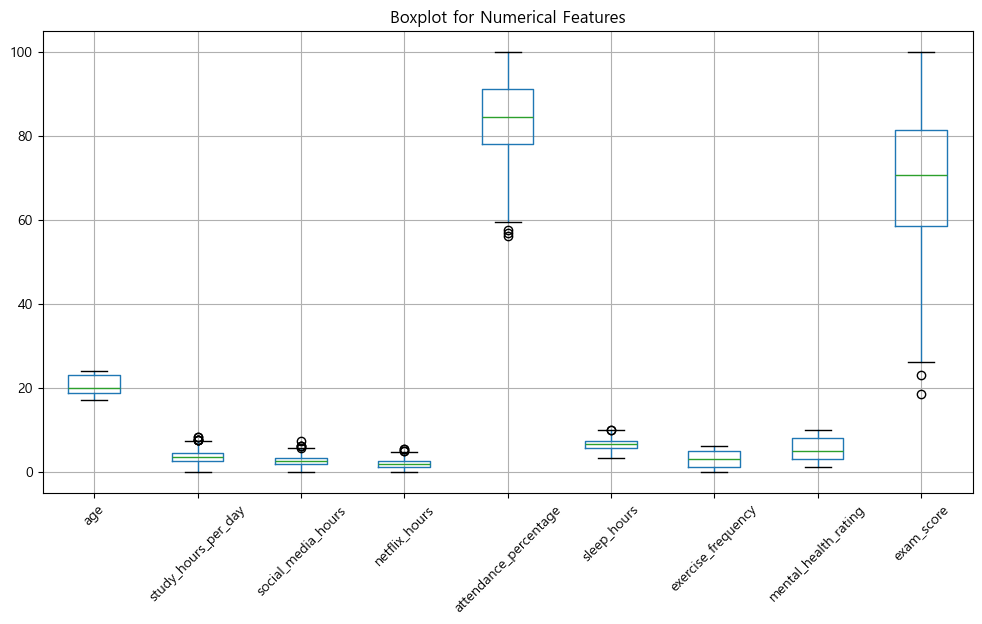

In [126]:
print(df.isnull().sum())  # 결측치 개수 확인

# 이상치 탐색: 전체 박스플롯
import matplotlib.pyplot as plt
df.select_dtypes(include=['float64', 'int64']).boxplot(figsize=(12, 6))
plt.title('Boxplot for Numerical Features')
plt.xticks(rotation=45)
plt.show()

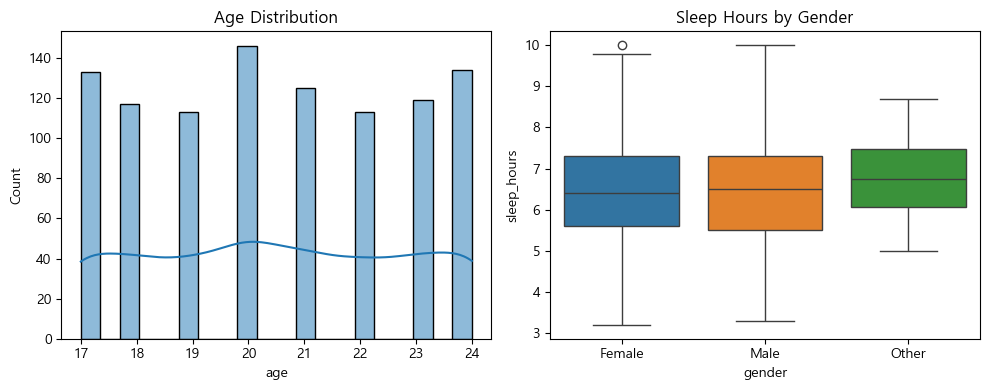

In [131]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Histogram on ax[0]
sns.histplot(df['age'], bins=20, kde=True, ax=ax[0])
ax[0].set_title('Age Distribution')

# Boxplot on ax[1]
sns.boxplot(x='gender', y='sleep_hours', data=df, palette='tab10', hue='gender', ax=ax[1])
ax[1].set_title('Sleep Hours by Gender')

plt.tight_layout()
plt.show()

In [133]:
# 수치형 상관계수
print(df.corr(numeric_only=True))

# 범주형 교차표 예시
pd.crosstab(df['diet_quality'], df['exam_score'])

                            age  study_hours_per_day  social_media_hours  \
age                    1.000000             0.003971           -0.009151   
study_hours_per_day    0.003971             1.000000            0.020282   
social_media_hours    -0.009151             0.020282            1.000000   
netflix_hours         -0.001174            -0.031158            0.011477   
attendance_percentage -0.026055             0.026264            0.040479   
sleep_hours            0.037482            -0.027757            0.018236   
exercise_frequency    -0.003836            -0.028701           -0.037319   
mental_health_rating  -0.045101            -0.003768            0.001496   
exam_score            -0.008907             0.825419           -0.166733   

                       netflix_hours  attendance_percentage  sleep_hours  \
age                        -0.001174              -0.026055     0.037482   
study_hours_per_day        -0.031158               0.026264    -0.027757   
social_medi

exam_score    18.4   23.1   26.2   26.7   26.8   27.6   28.0   29.5   29.7   \
diet_quality                                                                  
Fair              0      1      1      1      0      0      1      1      0   
Good              1      0      0      0      1      1      0      0      0   
Poor              0      0      0      0      1      0      0      0      1   

exam_score    29.9   ...  98.3   98.4   98.5   98.7   98.8   99.0   99.3   \
diet_quality         ...                                                    
Fair              0  ...      0      1      0      3      2      0      0   
Good              0  ...      1      0      0      0      0      1      0   
Poor              1  ...      0      0      1      0      0      0      1   

exam_score    99.4   99.9   100.0  
diet_quality                       
Fair              1      1     22  
Good              0      0     15  
Poor              0      0     11  

[3 rows x 480 columns]

In [134]:
# student_id                    (drop 하기)
# gender                        (one-hot-encoding 하기)
# part_time_job                 (one-hot-encoding 하기)
# diet_quality                  (one-hot-encoding 하기)
# parental_education_level      (먼저 fillna로 결측치 채워놓은 후 one-hot-encoding 하기)
# internet_quality              (one-hot-encoding 하기)
# extracurricular_participation (one-hot-encoding 하기)

df = df.drop(['student_id'], axis=1)
df['parental_education_level'] = df['parental_education_level'].fillna('none')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       1000 non-null   object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

age  gender  study_hours_per_day  social_media_hours  netflix_hours  \
0   23  Female                  0.0                 1.2            1.1   
1   20  Female                  6.9                 2.8            2.3   
2   21    Male                  1.4                 3.1            1.3   
3   23  Female                  1.0                 3.9            1.0   
4   19  Female                  5.0                 4.4            0.5   

  part_time_job  attendance_percentage  sleep_hours diet_quality  \
0            No                   85.0          8.0         Fair   
1            No                   97.3          4.6         Good   
2            No                   94.8          8.0         Poor   
3            No                   71.0          9.2         Poor   
4            No                   90.9          4.9         Fair   

   exercise_frequency parental_education_level internet_quality  \
0                   6                   Master          Average   
1                   6              High School          Average   
2                   1              High School             Poor   
3                   4                   Master             Good   
4                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4

In [40]:
# # encoding은 나중에
#
# # student_id                    (drop 하기)
# # gender                        (one-hot-encoding 하기)
# # part_time_job                 (one-hot-encoding 하기)
# # diet_quality                  (one-hot-encoding 하기)
# # parental_education_level      (먼저 fillna로 결측치 채워놓은 후 one-hot-encoding 하기)
# # internet_quality              (one-hot-encoding 하기)
# # extracurricular_participation (one-hot-encoding 하기)
# def format_features(df):
#     encoding_columns = [
#         'gender',
#         'part_time_job',
#         'diet_quality',
#         'parental_education_level',
#         'internet_quality',
#         'extracurricular_participation'
#     ]
#
#
#


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [169]:
# 수면 시간 범주화
# 시험 점수 범주화
df['sleep_category'] = pd.cut(df['sleep_hours'], bins=[0, 5, 7, 9, 12], labels=['Low', 'Normal', 'Good', 'Too Much'])

df['exam_score_category'] = pd.cut(df['exam_score'], bins = [0, 50, 70, 85, 100], labels = ['Poor', 'Average', 'Good', 'Excellent'])

In [173]:
df.head()

age  gender  study_hours_per_day  social_media_hours  netflix_hours  \
0   23  Female                  0.0                 1.2            1.1   
1   20  Female                  6.9                 2.8            2.3   
2   21    Male                  1.4                 3.1            1.3   
3   23  Female                  1.0                 3.9            1.0   
4   19  Female                  5.0                 4.4            0.5   

  part_time_job  attendance_percentage  sleep_hours diet_quality  \
0            No                   85.0          8.0         Fair   
1            No                   97.3          4.6         Good   
2            No                   94.8          8.0         Poor   
3            No                   71.0          9.2         Poor   
4            No                   90.9          4.9         Fair   

   exercise_frequency parental_education_level internet_quality  \
0                   6                   Master          Average   
1                   6              High School          Average   
2                   1              High School             Poor   
3                   4                   Master             Good   
4                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  \
0                     8                           Yes        56.2   
1                     8                            No       100.0   
2                     1                            No        34.3   
3                     1                           Yes        26.8   
4                     1                            No        66.4   

  sleep_category exam_score_category  
0           Good             Average  
1            Low           Excellent  
2           Good                Poor  
3       Too Much                Poor  
4            Low             Average

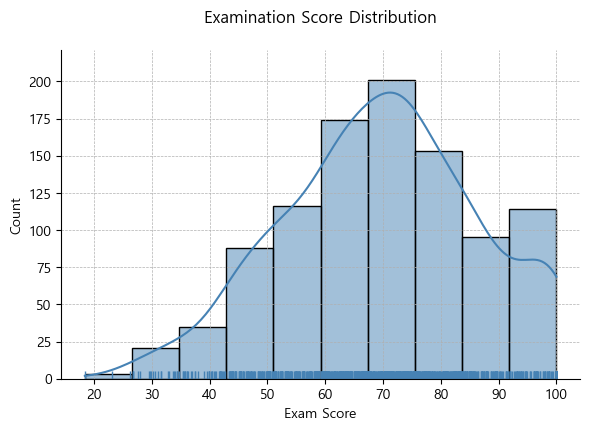

In [232]:
# 점수 분포도

sns.displot(df['exam_score'], bins = 10, height = 4, aspect = 1.5, rug = True, kde=True, color= 'steelblue')
plt.title('Examination Score Distribution', pad = 20)
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

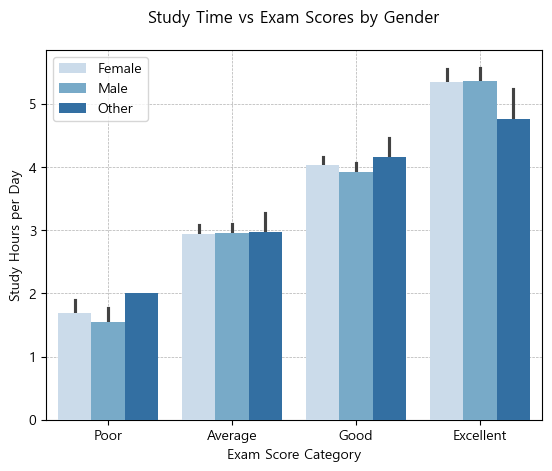

In [290]:
# 공부하는 시간비례 시험 점수

sns.barplot(
    data=df,
    x='exam_score_category',
    y='study_hours_per_day',
    hue='gender',
    palette='Blues',
    zorder=3
)
plt.title('Study Time vs Exam Scores by Gender', pad=20)
plt.xlabel('Exam Score Category')
plt.ylabel('Study Hours per Day')

plt.grid(True, linestyle='--', linewidth=0.5, zorder=0)

plt.legend()
plt.show()

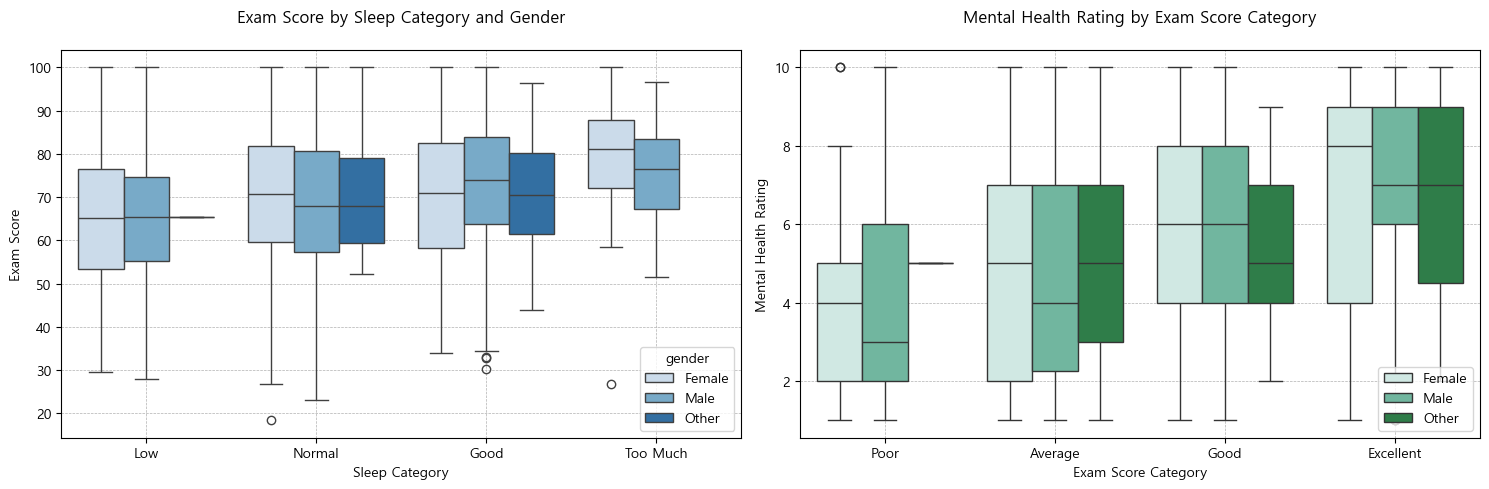

In [291]:
# 1. 잠자는 시간 비례 시험점수
# 2. 성적비례 멘탈 건강 비율

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(
    data=df,
    x='sleep_category',
    y='exam_score',
    hue='gender',
    palette='Blues',
    ax=ax[0],
    zorder=3
)
ax[0].set_title('Exam Score by Sleep Category and Gender', pad=20)
ax[0].set_xlabel('Sleep Category')
ax[0].set_ylabel('Exam Score')
ax[0].grid(True, linestyle='--', linewidth=0.5, zorder=0)

sns.boxplot(
    data=df,
    x='exam_score_category',
    y='mental_health_rating',
    hue='gender',
    palette='BuGn',
    ax=ax[1],
    zorder=3
)
ax[1].legend(loc='lower right')
ax[1].set_title('Mental Health Rating by Exam Score Category', pad=20)
ax[1].set_xlabel('Exam Score Category')
ax[1].set_ylabel('Mental Health Rating')
ax[1].grid(True, linestyle='--', linewidth=0.5, zorder=0)

plt.tight_layout()
plt.show()

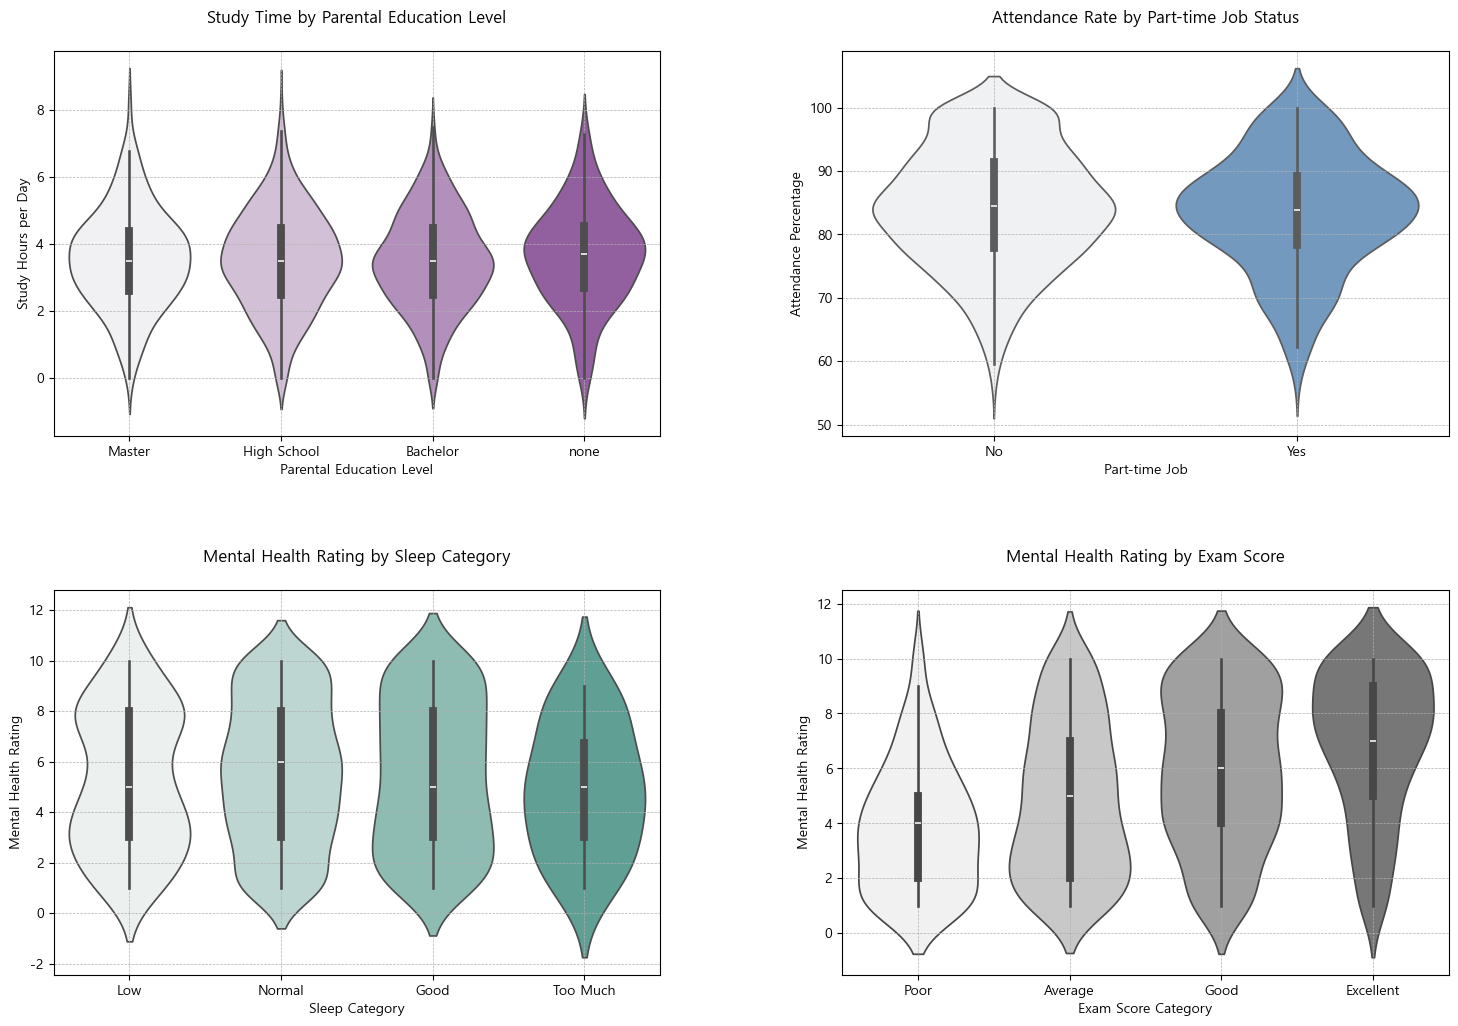

In [351]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 1. 부모 교육수준 비례 공부시간
sns.violinplot(
    data=df,
    x='parental_education_level',
    y='study_hours_per_day',
    hue='parental_education_level',
    palette='light:#95A',
    ax=axes[0, 0],
)
axes[0, 0].set_title('Study Time by Parental Education Level', pad=20)
axes[0, 0].set_xlabel('Parental Education Level')
axes[0, 0].set_ylabel('Study Hours per Day')
axes[0, 0].grid(True, linestyle='--', linewidth=0.5, zorder=0)

# 2. 알바하고 있는지 여부에 따른 출석률
sns.violinplot(
    data=df,
    x='part_time_job',
    y='attendance_percentage',
    hue='part_time_job',
    palette='light:#69C',
    ax=axes[0, 1],
)
axes[0, 1].set_title('Attendance Rate by Part-time Job Status', pad=20)
axes[0, 1].set_xlabel('Part-time Job')
axes[0, 1].set_ylabel('Attendance Percentage')
axes[0, 1].grid(True, linestyle='--', linewidth=0.5, zorder=0)

# 3. 수면시간 비례 멘탈 건강
sns.violinplot(
    data=df,
    x='sleep_category',
    y='mental_health_rating',
    hue='sleep_category',
    palette='light:#5A9',
    ax=axes[1, 0],
)
axes[1, 0].set_title('Mental Health Rating by Sleep Category', pad=20)
axes[1, 0].set_xlabel('Sleep Category')
axes[1, 0].set_ylabel('Mental Health Rating')
axes[1, 0].grid(True, linestyle='--', linewidth=0.5, zorder=0)

# 4. 시험점수 비례 멘탈 건강
sns.violinplot(
    data=df,
    x='exam_score_category',
    y='mental_health_rating',
    hue='exam_score_category',
    palette='light:#777',
    ax=axes[1, 1],
)
axes[1, 1].set_title('Mental Health Rating by Exam Score', pad=20)
axes[1, 1].set_xlabel('Exam Score Category')
axes[1, 1].set_ylabel('Mental Health Rating')
axes[1, 1].grid(True, linestyle='--', linewidth=0.5, zorder=0)

plt.show()


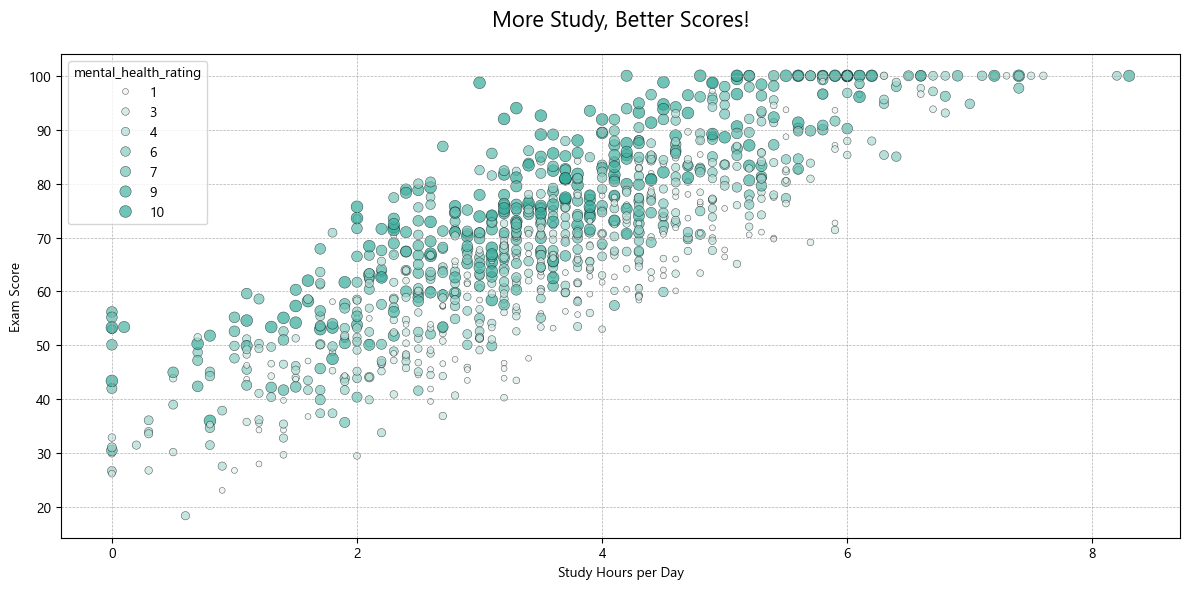

In [427]:
# 공부할수록 성적도 좋아지고 멘탈건강도 좋아지고?!

plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df,
    x='study_hours_per_day',
    y='exam_score',
    hue='mental_health_rating',
    palette='light:#3A9',
    size='mental_health_rating',
    alpha=0.7,
    edgecolor='black'
)
plt.title('More Study, Better Scores!', fontsize=16, pad=20)
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.grid(True, linestyle='--', linewidth=0.5, zorder=0)
plt.tight_layout()
plt.show()

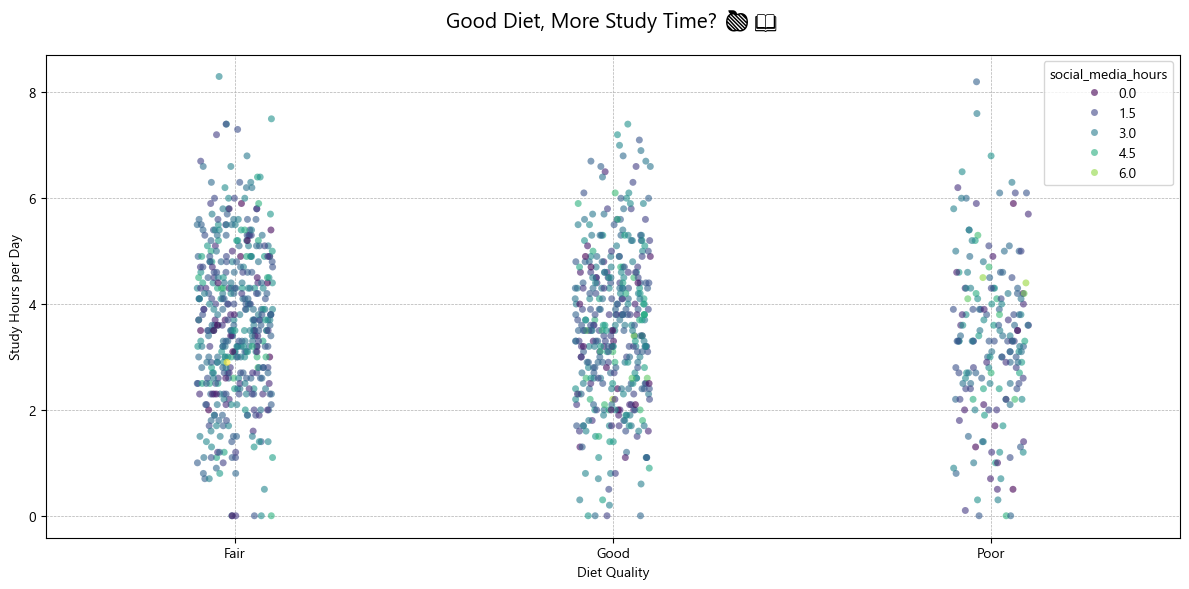

In [462]:
# 식단이 좋으면 공부를 더 오래할까?

plt.figure(figsize=(12, 6))

sns.stripplot(
    data=df,
    x='diet_quality',
    y='study_hours_per_day',
    hue='social_media_hours',
    jitter=True,
    alpha=0.6,
    palette='viridis'
)
plt.title('Good Diet, More Study Time? 🍎📖', fontsize=15, pad=20)
plt.xlabel('Diet Quality')
plt.ylabel('Study Hours per Day')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


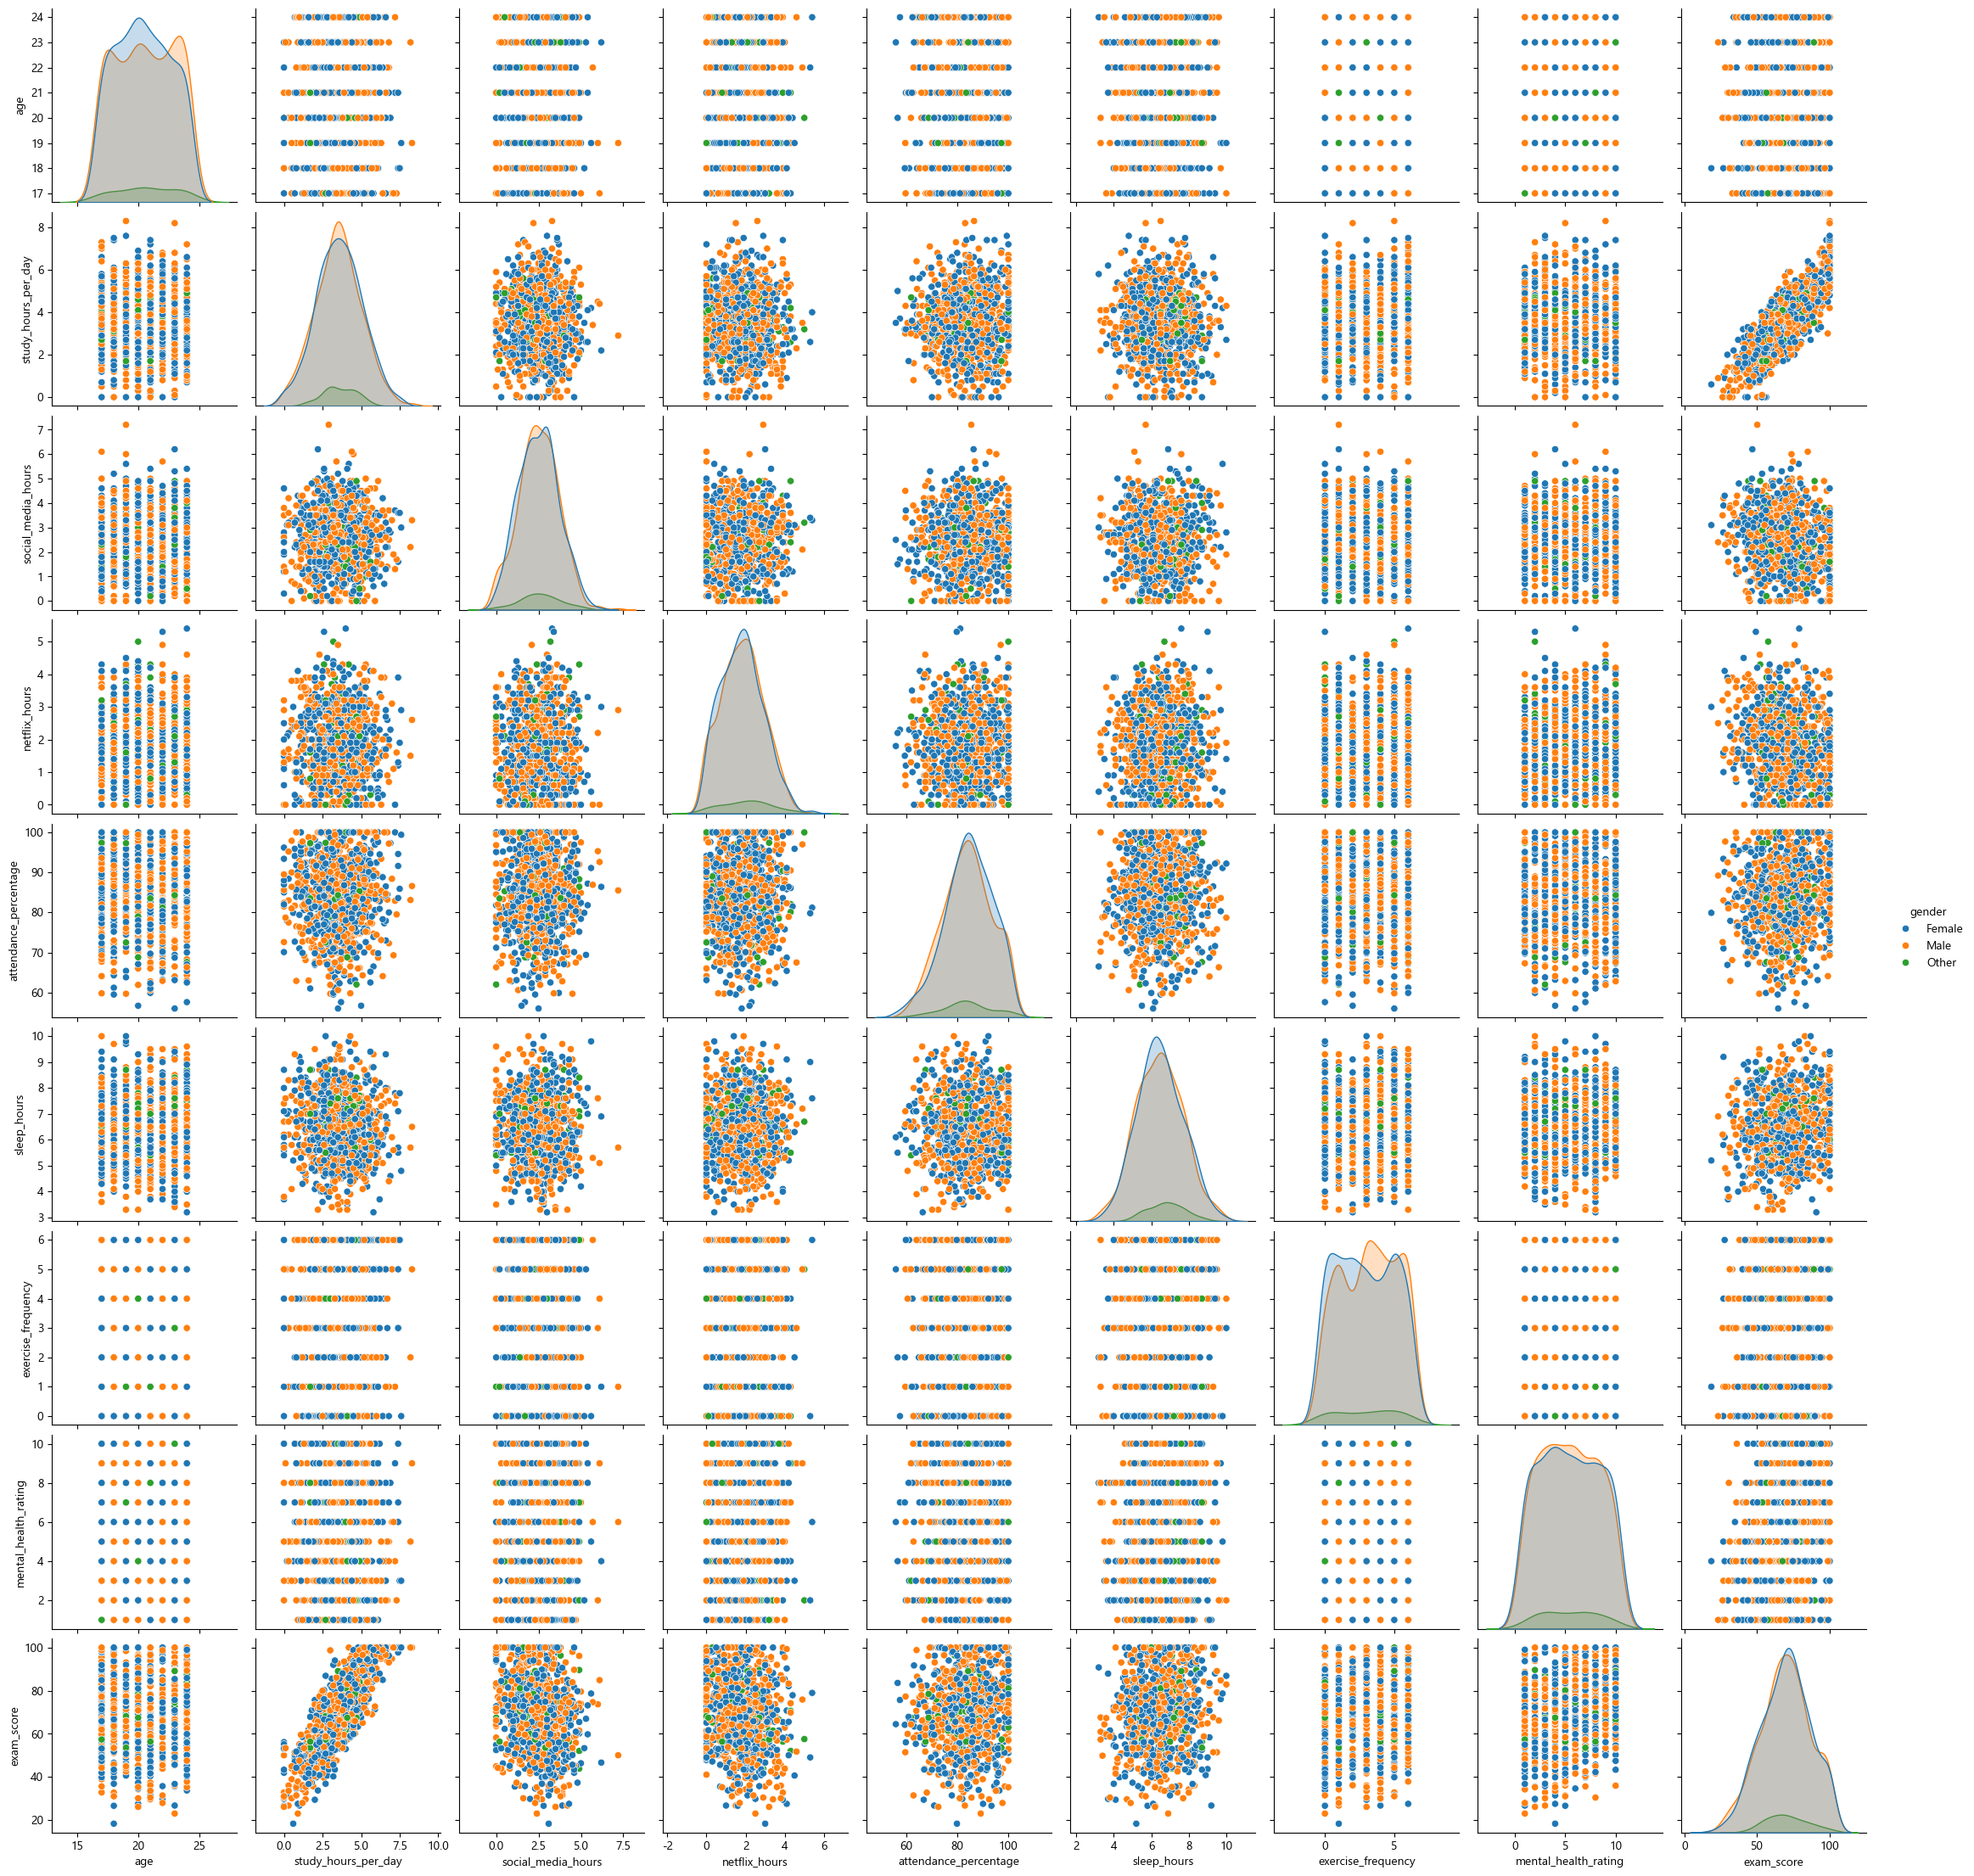

In [478]:
sns.pairplot(df, hue= 'gender')
plt.show()

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            1000 non-null   int64   
 1   gender                         1000 non-null   object  
 2   study_hours_per_day            1000 non-null   float64 
 3   social_media_hours             1000 non-null   float64 
 4   netflix_hours                  1000 non-null   float64 
 5   part_time_job                  1000 non-null   object  
 6   attendance_percentage          1000 non-null   float64 
 7   sleep_hours                    1000 non-null   float64 
 8   diet_quality                   1000 non-null   object  
 9   exercise_frequency             1000 non-null   int64   
 10  parental_education_level       1000 non-null   object  
 11  internet_quality               1000 non-null   object  
 12  mental_health_rating           1000

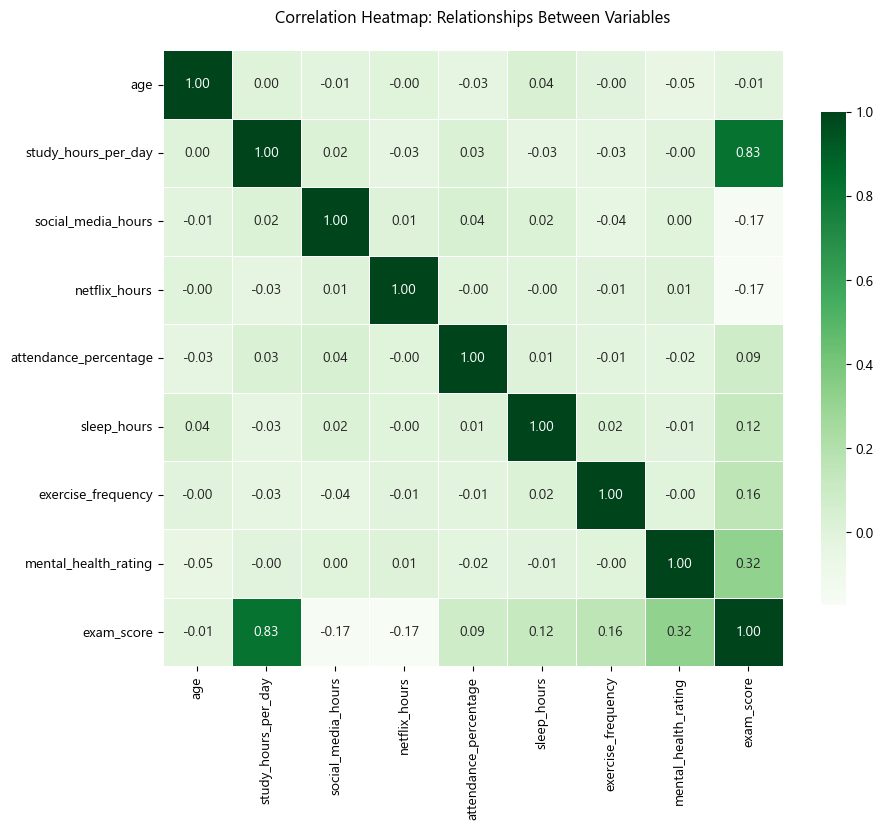

In [491]:

# 숫자형 데이터만 선택
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 상관행렬 계산
corr_matrix = df[numeric_cols].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Greens',
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title('Correlation Heatmap: Relationships Between Variables', pad=20)
plt.show()

In [ ]:
# # regplot : 두 변수간의 상관관례 시각화 (산포도 + 회귀선)
# fig, ax = plt.subplots(3, 5, figsize = (16, 10))
# feature_names = boston_housing_df.columns[:-1] # 마지막 target값은 제거해준것 ! 13개의 컬럼
# feature_names
#
# # 마지막 타겟값 = medv 미디엄 벨류와의 모든 컬럼 관계!
# for i, feature in enumerate(feature_names):
#     row = i // 5  # 0 1 2 3 4 ( 0 0 0 0 0 ) 5 6 7 8 9 (1 1 1 1 1)  10 11 12  (2 2 2)  # 몫
#     col = i %  5 # 0 1 2 3 4 0 1 2 3 4 ...                                            # 나머지
#     sns.regplot(x=feature, y='MEDV', data=boston_housing_df, ax = ax[row, col])
#
# plt.show()
